# Imports

In [273]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [274]:
#Imports de base
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [275]:
!pwd


/Users/Edouard_1/code/TheLab75/ParisDeepAirProject/notebooks/Louis


In [276]:
#Import du fichier à analyser
PA75016_df = pd.read_csv("../../data/pollution/2_Processed/PA75016.csv").copy()





#/Users/Edouard_1/code/TheLab75/ParisDeepAirProject/data/pollution/2_Processed/PA75016.csv
PA75016_df = PA75016_df[:-25]
PA75016_df











,Date_time,PM25,PM10,NO2,O3,SO2,Station_name,Station_type
0,2018/01/01 01:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
1,2018/01/01 02:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
2,2018/01/01 03:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
3,2018/01/01 04:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
4,2018/01/01 05:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
...,...,...,...,...,...,...,...,...
42546,2022/11/13 19:00:00+00,18.5,18.2,35.4,NaN,NaN,75016 - Porte Auteuil,Traffic
42547,2022/11/13 20:00:00+00,18.8,21.8,29.6,NaN,NaN,75016 - Porte Auteuil,Traffic
42548,2022/11/13 21:00:00+00,19.4,29.9,32.1,NaN,NaN,75016 - Porte Auteuil,Traffic
42549,2022/11/13 22:00:00+00,22.8,23.2,29.4,NaN,NaN,75016 - Porte Auteuil,Traffic


# EDA

In [277]:
from workflow.utils import analyse_df


In [278]:
#Analyse du fichier PA75016
analyse_df(PA75016_df)

General Info:
42551 Rows 8 Columns
0 Duplicated Rows
Memory Usage: 2.60Mb

Columns float64: ['PM25', 'PM10', 'NO2', 'O3', 'SO2']

Columns object: ['Date_time', 'Station_name', 'Station_type']


,PM25,PM10,NO2,O3,SO2
count,41229.000000,41405.000000,40738.000000,0.0,25444.000000
mean,15.098152,33.391631,73.241266,NaN,1.309079
std,8.906364,17.560687,29.101300,NaN,1.363716
min,0.000000,0.400000,5.100000,NaN,0.000000
25%,9.200000,21.100000,53.500000,NaN,0.200000
50%,13.000000,29.900000,71.100000,NaN,1.000000
75%,18.400000,41.800000,90.300000,NaN,2.000000
max,193.000000,253.000000,286.000000,NaN,75.900000



Cheking Missing Values:
Column "PM25" has 1322 missing values (3.11%)
Column "PM10" has 1146 missing values (2.69%)
Column "NO2" has 1813 missing values (4.26%)
Column "O3" has 42551 missing values (100.00%)
Column "SO2" has 17107 missing values (40.20%)

Checking Linear Correlation:
Linear Correlation found between columns PM10 and PM25 -> Pearson coef. = 0.78


/Users/Edouard_1/code/TheLab75/ParisDeepAirProject/workflow/utils.py:83: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr() # Correlation DataFrame


In [279]:
PA75016_df.boxplot();

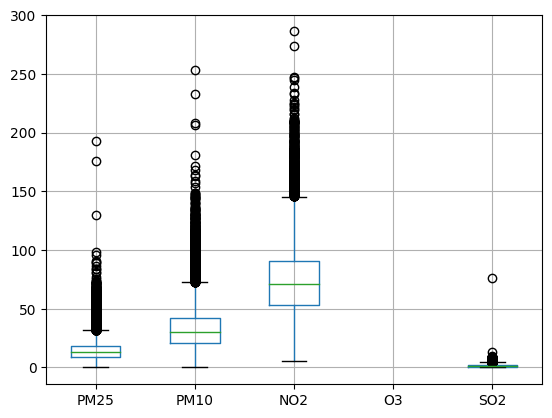

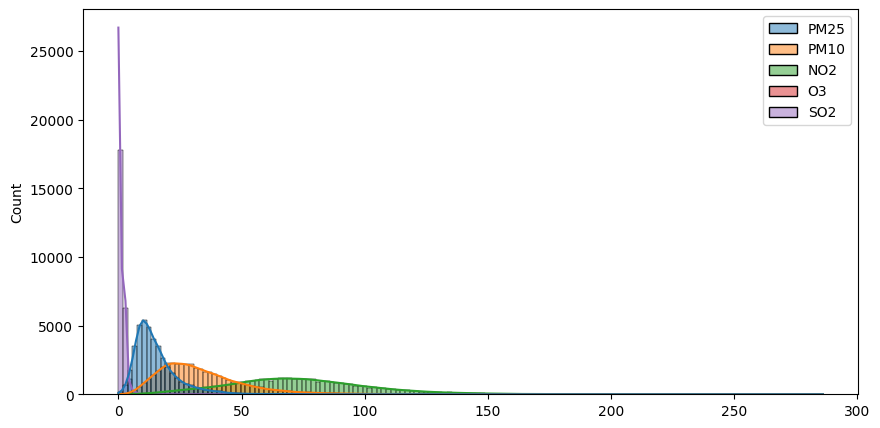

In [280]:
plt.figure(figsize=(10,5))
sns.histplot(data=PA75016_df,kde=True,bins=150)
plt.show()

## Conlusion de l'EDA

Synthèse de l'EDA sur la station PA75016:
- De 2018 à 2022, la part de NaN est faible pour les polluants suivants : PM25, PM10 & NO2 (<6% de NaN) --> **À garder.**
- Concernnant le SO2, la part de NaN est faible, progresse à partir de 2020, pour exploser en 2021, et atteindre 100% en 2022. -->  **À dropper.**
- Concernant l'O3, le nombre de NaN est à 100% de 2018 à 2022 --> **À dropper.**

# Preprocessing

In [281]:
## Drop des colonnes avec beaucoup de Nan
PA75016_df = PA75016_df.drop(columns=['O3', 'SO2', 'Station_name', 'Station_type'])
PA75016_df

,Date_time,PM25,PM10,NO2
0,2018/01/01 01:00:00+00,NaN,NaN,NaN
1,2018/01/01 02:00:00+00,NaN,NaN,NaN
2,2018/01/01 03:00:00+00,NaN,NaN,NaN
3,2018/01/01 04:00:00+00,NaN,NaN,NaN
4,2018/01/01 05:00:00+00,NaN,NaN,NaN
...,...,...,...,...
42546,2022/11/13 19:00:00+00,18.5,18.2,35.4
42547,2022/11/13 20:00:00+00,18.8,21.8,29.6
42548,2022/11/13 21:00:00+00,19.4,29.9,32.1
42549,2022/11/13 22:00:00+00,22.8,23.2,29.4


## X & y - SimpleImputer

In [282]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer

num_features_normal = ['NO2']
num_features_skewed = ['PM25','PM10']

num_imputer_normal = make_pipeline(
    SimpleImputer(strategy='median'))

num_imputer_skewed = make_pipeline(
    SimpleImputer(strategy='median'))

preprocessor_imputer = make_column_transformer(
    (num_imputer_normal, num_features_normal),
    (num_imputer_skewed, num_features_skewed))

preprocessor_imputer

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['NO2']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['PM25', 'PM10'])])

In [283]:
PA75016_preprocessed = pd.DataFrame(preprocessor_imputer.fit_transform(PA75016_df))

In [284]:
PA75016_preprocessed = PA75016_preprocessed.rename(columns={0:"PM25",1:"PM10",2:"NO2"})
PA75016_preprocessed = PA75016_preprocessed.set_index(PA75016_df['Date_time'])

In [285]:
PA75016_preprocessed

,PM25,PM10,NO2
Date_time,,,
2018/01/01 01:00:00+00,71.1,13.0,29.9
2018/01/01 02:00:00+00,71.1,13.0,29.9
2018/01/01 03:00:00+00,71.1,13.0,29.9
2018/01/01 04:00:00+00,71.1,13.0,29.9
2018/01/01 05:00:00+00,71.1,13.0,29.9
...,...,...,...
2022/11/13 19:00:00+00,35.4,18.5,18.2
2022/11/13 20:00:00+00,29.6,18.8,21.8
2022/11/13 21:00:00+00,32.1,19.4,29.9


In [286]:
PA75016_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42551 entries, 2018/01/01 01:00:00+00 to 2022/11/13 23:00:00+00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM25    42551 non-null  float64
 1   PM10    42551 non-null  float64
 2   NO2     42551 non-null  float64
dtypes: float64(3)
memory usage: 1.3+ MB


## X & y - Passer Date_time d'un step horaire à un step journalier

In [287]:
from workflow.daily_basis import mean_max_categorical

PA75016_daily = mean_max_categorical(PA75016_preprocessed)

In [288]:
PA75016_daily

,Date_time,PM25,PM10,NO2
0,2018/01/01,71.10,13.00,29.9
1,2018/01/02,71.10,13.00,29.9
2,2018/01/03,71.10,13.00,29.9
3,2018/01/04,71.10,13.00,29.9
4,2018/01/05,71.10,12.83,36.2
...,...,...,...,...
1770,2022/11/09,57.41,9.46,36.0
1771,2022/11/10,55.69,13.10,42.8
1772,2022/11/11,35.26,10.79,25.7
1773,2022/11/12,49.01,23.87,82.2


## Obtenir y

In [289]:
from workflow.calcul_ATMO import general_categorical

PA75016_daily_cat = PA75016_daily.copy()
PA75016_daily_cat = general_categorical(PA75016_daily_cat)
PA75016_daily_cat

,Date_time,PM25,PM10,NO2,PM25_categorical,PM10_categorical,NO2_categorical
0,2018/01/01,71.10,13.00,29.9,4,0,0
1,2018/01/02,71.10,13.00,29.9,4,0,0
2,2018/01/03,71.10,13.00,29.9,4,0,0
3,2018/01/04,71.10,13.00,29.9,4,0,0
4,2018/01/05,71.10,12.83,36.2,4,0,0
...,...,...,...,...,...,...,...
1770,2022/11/09,57.41,9.46,36.0,4,0,0
1771,2022/11/10,55.69,13.10,42.8,4,0,1
1772,2022/11/11,35.26,10.79,25.7,3,0,0
1773,2022/11/12,49.01,23.87,82.2,3,1,1


In [290]:
from workflow.calcul_ATMO import calcul_ATMO

PA75016_daily_cat = calcul_ATMO(PA75016_daily_cat)

In [291]:
PA75016_daily_cat

,Date_time,PM25,PM10,NO2,PM25_categorical,PM10_categorical,NO2_categorical,ATMO
0,2018/01/01,71.10,13.00,29.9,4,0,0,4
1,2018/01/02,71.10,13.00,29.9,4,0,0,4
2,2018/01/03,71.10,13.00,29.9,4,0,0,4
3,2018/01/04,71.10,13.00,29.9,4,0,0,4
4,2018/01/05,71.10,12.83,36.2,4,0,0,4
...,...,...,...,...,...,...,...,...
1770,2022/11/09,57.41,9.46,36.0,4,0,0,4
1771,2022/11/10,55.69,13.10,42.8,4,0,1,4
1772,2022/11/11,35.26,10.79,25.7,3,0,0,3
1773,2022/11/12,49.01,23.87,82.2,3,1,1,3


In [292]:
y = PA75016_daily_cat[['Date_time','ATMO']]
y.set_index(y['Date_time'],inplace=True)
y = y[['ATMO']]

In [293]:
y

,ATMO
Date_time,
2018/01/01,4
2018/01/02,4
2018/01/03,4
2018/01/04,4
2018/01/05,4
...,...
2022/11/09,4
2022/11/10,4
2022/11/11,3


In [294]:
y.to_csv('../../data/pollution/inputs/y.csv', index=True)


In [295]:
#Test import avec index
pd.read_csv('../../data/pollution/inputs/y.csv',index_col='Date_time')


,ATMO
Date_time,
2018/01/01,4
2018/01/02,4
2018/01/03,4
2018/01/04,4
2018/01/05,4
...,...
2022/11/09,4
2022/11/10,4
2022/11/11,3


## Obtenir X

In [296]:
X = PA75016_daily.copy()
X.set_index(X['Date_time'],inplace=True)
X = X.drop(columns='Date_time')
X


,PM25,PM10,NO2
Date_time,,,
2018/01/01,71.10,13.00,29.9
2018/01/02,71.10,13.00,29.9
2018/01/03,71.10,13.00,29.9
2018/01/04,71.10,13.00,29.9
2018/01/05,71.10,12.83,36.2
...,...,...,...
2022/11/09,57.41,9.46,36.0
2022/11/10,55.69,13.10,42.8
2022/11/11,35.26,10.79,25.7


In [297]:
#Créer un pipeline avec un Robust Scaler
from sklearn.preprocessing import RobustScaler

preprocessor_scaler = make_pipeline(
    RobustScaler())

preprocessor_scaler


Pipeline(steps=[('robustscaler', RobustScaler())])

In [298]:
X = pd.DataFrame(preprocessor_scaler.fit_transform(X))


In [299]:
X = X.rename(columns={0:"PM25",1:"PM10",2:"NO2"})
X = X.set_index(PA75016_daily['Date_time'])


In [300]:
X


,PM25,PM10,NO2
Date_time,,,
2018/01/01,0.000000,-0.001422,-0.732394
2018/01/02,0.000000,-0.001422,-0.732394
2018/01/03,0.000000,-0.001422,-0.732394
2018/01/04,0.000000,-0.001422,-0.732394
2018/01/05,0.000000,-0.025605,-0.510563
...,...,...,...
2022/11/09,-0.562911,-0.504979,-0.517606
2022/11/10,-0.633635,0.012802,-0.278169
2022/11/11,-1.473684,-0.315789,-0.880282


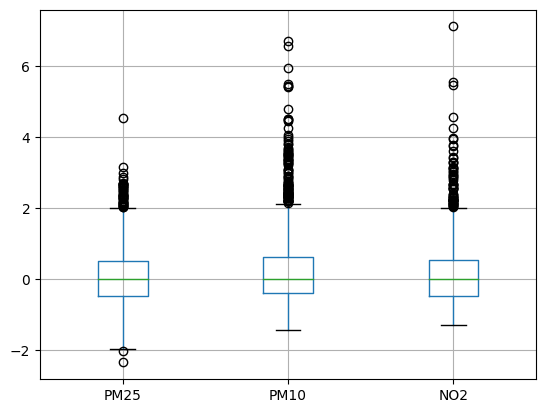

In [301]:
X.boxplot();
plt.show()


In [302]:
X.to_csv('../../data/pollution/inputs/X.csv', index=True)



In [303]:
#Test import avec index
pd.read_csv('../../data/pollution/inputs/X.csv',index_col='Date_time')



,PM25,PM10,NO2
Date_time,,,
2018/01/01,0.000000,-0.001422,-0.732394
2018/01/02,0.000000,-0.001422,-0.732394
2018/01/03,0.000000,-0.001422,-0.732394
2018/01/04,0.000000,-0.001422,-0.732394
2018/01/05,0.000000,-0.025605,-0.510563
...,...,...,...
2022/11/09,-0.562911,-0.504979,-0.517606
2022/11/10,-0.633635,0.012802,-0.278169
2022/11/11,-1.473684,-0.315789,-0.880282


## Concaténer X & y dans un seul dataframe

In [304]:
Xy_PA75016 = pd.concat([X, y], axis = 1)


In [305]:
Xy_PA75016

,PM25,PM10,NO2,ATMO
Date_time,,,,
2018/01/01,0.000000,-0.001422,-0.732394,4
2018/01/02,0.000000,-0.001422,-0.732394,4
2018/01/03,0.000000,-0.001422,-0.732394,4
2018/01/04,0.000000,-0.001422,-0.732394,4
2018/01/05,0.000000,-0.025605,-0.510563,4
...,...,...,...,...
2022/11/09,-0.562911,-0.504979,-0.517606,4
2022/11/10,-0.633635,0.012802,-0.278169,4
2022/11/11,-1.473684,-0.315789,-0.880282,3


In [306]:
Xy_PA75016.to_csv('../../data/pollution/inputs/Xy_PA75016.csv', index=True)



In [307]:
#Test import avec index
pd.read_csv('../../data/pollution/inputs/Xy_PA75016.csv',index_col='Date_time')



,PM25,PM10,NO2,ATMO
Date_time,,,,
2018/01/01,0.000000,-0.001422,-0.732394,4
2018/01/02,0.000000,-0.001422,-0.732394,4
2018/01/03,0.000000,-0.001422,-0.732394,4
2018/01/04,0.000000,-0.001422,-0.732394,4
2018/01/05,0.000000,-0.025605,-0.510563,4
...,...,...,...,...
2022/11/09,-0.562911,-0.504979,-0.517606,4
2022/11/10,-0.633635,0.012802,-0.278169,4
2022/11/11,-1.473684,-0.315789,-0.880282,3


In [308]:
Xy_PA75016





,PM25,PM10,NO2,ATMO
Date_time,,,,
2018/01/01,0.000000,-0.001422,-0.732394,4
2018/01/02,0.000000,-0.001422,-0.732394,4
2018/01/03,0.000000,-0.001422,-0.732394,4
2018/01/04,0.000000,-0.001422,-0.732394,4
2018/01/05,0.000000,-0.025605,-0.510563,4
...,...,...,...,...
2022/11/09,-0.562911,-0.504979,-0.517606,4
2022/11/10,-0.633635,0.012802,-0.278169,4
2022/11/11,-1.473684,-0.315789,-0.880282,3


In [309]:
Xy_PA75016 = Xy_PA75016.reset_index()
Xy_PA75016






,Date_time,PM25,PM10,NO2,ATMO
0,2018/01/01,0.000000,-0.001422,-0.732394,4
1,2018/01/02,0.000000,-0.001422,-0.732394,4
2,2018/01/03,0.000000,-0.001422,-0.732394,4
3,2018/01/04,0.000000,-0.001422,-0.732394,4
4,2018/01/05,0.000000,-0.025605,-0.510563,4
...,...,...,...,...,...
1770,2022/11/09,-0.562911,-0.504979,-0.517606,4
1771,2022/11/10,-0.633635,0.012802,-0.278169,4
1772,2022/11/11,-1.473684,-0.315789,-0.880282,3
1773,2022/11/12,-0.908306,1.544808,1.109155,3


In [310]:

Xy_PA75016["Date_time"]= pd.to_datetime(Xy_PA75016["Date_time"])
Xy_PA75016.dtypes
Xy_PA75016["day"] = Xy_PA75016["Date_time"].dt.day_of_week
Xy_PA75016["month"] = Xy_PA75016["Date_time"].dt.month
Xy_PA75016






,Date_time,PM25,PM10,NO2,ATMO,day,month
0,2018-01-01,0.000000,-0.001422,-0.732394,4,0,1
1,2018-01-02,0.000000,-0.001422,-0.732394,4,1,1
2,2018-01-03,0.000000,-0.001422,-0.732394,4,2,1
3,2018-01-04,0.000000,-0.001422,-0.732394,4,3,1
4,2018-01-05,0.000000,-0.025605,-0.510563,4,4,1
...,...,...,...,...,...,...,...
1770,2022-11-09,-0.562911,-0.504979,-0.517606,4,2,11
1771,2022-11-10,-0.633635,0.012802,-0.278169,4,3,11
1772,2022-11-11,-1.473684,-0.315789,-0.880282,3,4,11
1773,2022-11-12,-0.908306,1.544808,1.109155,3,5,11


In [311]:
import numpy as np


In [312]:
#On doit mettre nos jours de 1 à 7 

In [313]:
months_in_a_year = 12

Xy_PA75016['sin_Month'] = np.sin(2*np.pi*(Xy_PA75016.month-1)/months_in_a_year)
Xy_PA75016['cos_Month'] = np.cos(2*np.pi*(Xy_PA75016.month-1)/months_in_a_year)
#data.drop(columns=['MoSold'], inplace=True)

days_in_a_week = 7

Xy_PA75016['sin_day'] = np.sin(2*np.pi*(Xy_PA75016.day-1)/days_in_a_week)
Xy_PA75016['cos_day'] = np.cos(2*np.pi*(Xy_PA75016.day-1)/days_in_a_week)








In [314]:
  Xy_PA75016["confinement"] = Xy_PA75016["Date_time"].copy()
    

Xy_PA75016


,Date_time,PM25,PM10,NO2,ATMO,day,month,sin_Month,cos_Month,sin_day,cos_day,confinement
0,2018-01-01,0.000000,-0.001422,-0.732394,4,0,1,0.000000,1.0,-0.781831,0.623490,2018-01-01
1,2018-01-02,0.000000,-0.001422,-0.732394,4,1,1,0.000000,1.0,0.000000,1.000000,2018-01-02
2,2018-01-03,0.000000,-0.001422,-0.732394,4,2,1,0.000000,1.0,0.781831,0.623490,2018-01-03
3,2018-01-04,0.000000,-0.001422,-0.732394,4,3,1,0.000000,1.0,0.974928,-0.222521,2018-01-04
4,2018-01-05,0.000000,-0.025605,-0.510563,4,4,1,0.000000,1.0,0.433884,-0.900969,2018-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...
1770,2022-11-09,-0.562911,-0.504979,-0.517606,4,2,11,-0.866025,0.5,0.781831,0.623490,2022-11-09
1771,2022-11-10,-0.633635,0.012802,-0.278169,4,3,11,-0.866025,0.5,0.974928,-0.222521,2022-11-10
1772,2022-11-11,-1.473684,-0.315789,-0.880282,3,4,11,-0.866025,0.5,0.433884,-0.900969,2022-11-11
1773,2022-11-12,-0.908306,1.544808,1.109155,3,5,11,-0.866025,0.5,-0.433884,-0.900969,2022-11-12


In [315]:
#mask = (Xy_PA75016['confinement'] > "2020-16-03") & (Xy_PA75016['confinement'] <= "2020-11-05")
#mask




In [316]:
import datetime


In [317]:
#datetime.strptime("2020-16-03", format)




In [318]:
#Xy_PA75016["confinement"] = Xy_PA75016["confinement"].replace({Xy_PA75016["confinement"]:1})
#Xy_PA75016


In [319]:
Xy_PA75016["confinement"] = Xy_PA75016["Date_time"].copy()

test = datetime.datetime.strptime('2017-16-03', "%Y-%d-%m")
Xy_PA75016["confinement"] > test

        









0       True
1       True
2       True
3       True
4       True
        ... 
1770    True
1771    True
1772    True
1773    True
1774    True
Name: confinement, Length: 1775, dtype: bool

In [320]:
debut_confinement_1 = datetime.datetime.strptime('2020-16-03', "%Y-%d-%m")
debut_confinement_1


datetime.datetime(2020, 3, 16, 0, 0)

In [321]:
Xy_PA75016["confinement"]


0      2018-01-01
1      2018-01-02
2      2018-01-03
3      2018-01-04
4      2018-01-05
          ...    
1770   2022-11-09
1771   2022-11-10
1772   2022-11-11
1773   2022-11-12
1774   2022-11-13
Name: confinement, Length: 1775, dtype: datetime64[ns]

In [351]:
Xy_PA75016["confinement"] = Xy_PA75016["Date_time"].copy()

def covid_time(x):
    
    #le .apply s'applique à chaque rows

    
    debut_confinement_1 = datetime.datetime.strptime('2020-16-03', "%Y-%d-%m")
    fin_confinement_1 = datetime.datetime.strptime('2020-11-05', "%Y-%d-%m")
    
    debut_confinement_2 = datetime.datetime.strptime('2020-30-10', "%Y-%d-%m")
    fin_confinement_2 = datetime.datetime.strptime('2020-15-12', "%Y-%d-%m")
    
    debut_confinement_3 = datetime.datetime.strptime('2021-03-04', "%Y-%d-%m")
    fin_confinement_3 = datetime.datetime.strptime('2021-03-05', "%Y-%d-%m")
    
    
    
    
    
    if  debut_confinement_1 < x and x < fin_confinement_1:
        return 1
    
    elif debut_confinement_2 < x and x < fin_confinement_2:
        return 1
    
    elif debut_confinement_3 < x  and x  <  fin_confinement_3:
        return 1
    
    else :
        return 0
     
    
    
Xy_PA75016["confinement"]=  Xy_PA75016["confinement"].apply(covid_time)
Xy_PA75016   


    
    
    
    
    
    
    
    
    
    
    
    
    

,Date_time,PM25,PM10,NO2,ATMO,day,month,sin_Month,cos_Month,sin_day,cos_day,confinement
0,2018-01-01,0.000000,-0.001422,-0.732394,4,0,1,0.000000,1.0,-0.781831,0.623490,0
1,2018-01-02,0.000000,-0.001422,-0.732394,4,1,1,0.000000,1.0,0.000000,1.000000,0
2,2018-01-03,0.000000,-0.001422,-0.732394,4,2,1,0.000000,1.0,0.781831,0.623490,0
3,2018-01-04,0.000000,-0.001422,-0.732394,4,3,1,0.000000,1.0,0.974928,-0.222521,0
4,2018-01-05,0.000000,-0.025605,-0.510563,4,4,1,0.000000,1.0,0.433884,-0.900969,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1770,2022-11-09,-0.562911,-0.504979,-0.517606,4,2,11,-0.866025,0.5,0.781831,0.623490,0
1771,2022-11-10,-0.633635,0.012802,-0.278169,4,3,11,-0.866025,0.5,0.974928,-0.222521,0
1772,2022-11-11,-1.473684,-0.315789,-0.880282,3,4,11,-0.866025,0.5,0.433884,-0.900969,0
1773,2022-11-12,-0.908306,1.544808,1.109155,3,5,11,-0.866025,0.5,-0.433884,-0.900969,0


In [352]:
Xy_PA75016[Xy_PA75016["confinement"]==1]
















,Date_time,PM25,PM10,NO2,ATMO,day,month,sin_Month,cos_Month,sin_day,cos_day,confinement
804,2020-03-17,0.386513,1.458037,0.492958,5,1,3,0.866025,5.000000e-01,0.000000,1.000000,1
805,2020-03-18,0.118832,1.190612,0.260563,4,2,3,0.866025,5.000000e-01,0.781831,0.623490,1
806,2020-03-19,-0.091283,1.034139,0.176056,4,3,3,0.866025,5.000000e-01,0.974928,-0.222521,1
807,2020-03-20,-1.366776,2.857752,0.746479,3,4,3,0.866025,5.000000e-01,0.433884,-0.900969,1
808,2020-03-21,-1.725329,-0.398293,-0.919014,3,5,3,0.866025,5.000000e-01,-0.433884,-0.900969,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1210,2021-04-28,0.945724,0.899004,1.260563,5,2,4,1.000000,6.123234e-17,0.781831,0.623490,1
1211,2021-04-29,0.113487,1.089616,0.968310,4,3,4,1.000000,6.123234e-17,0.974928,-0.222521,1
1212,2021-04-30,0.544408,0.503556,0.165493,5,4,4,1.000000,6.123234e-17,0.433884,-0.900969,1
1213,2021-05-01,0.196135,1.113798,-0.031690,5,5,5,0.866025,-5.000000e-01,-0.433884,-0.900969,1
